In [1]:
# import necessary layers  
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense
from tensorflow.keras import Model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


input = Input(shape =(256,256,3))
# 1st Conv Block

x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 3rd Conv block

x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# Fully connected layers

x = Flatten()(x)
x = Dense(units = 256, activation ='relu')(x)
x = Dense(units = 128, activation ='relu')(x)
output = Dense(units = 2, activation ='softmax')(x)
# creating the model

model = Model (inputs=input, outputs =output)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)      

In [2]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [6]:
train_dir = 'dataset/train_images'
val_dir = 'dataset/val_images'
test_dir = 'dataset/test_images'
train_dir2 = 'train'

#datagen = ImageDataGenerator(1./255)
train_generator = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir2,
    validation_split=0.2,
    batch_size=64,
    image_size=(256,256),
    seed=123,
    color_mode='rgb',
    subset = 'training'
)
val_generator = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir2,
    validation_split=0.2,
    batch_size=64,
    image_size=(256,256),
    seed=123,
    color_mode='rgb',
    subset = 'validation'
)
print(train_generator.class_names)

Found 8104 files belonging to 2 classes.
Using 6484 files for training.
Found 8104 files belonging to 2 classes.
Using 1620 files for validation.
['fake', 'real']


In [4]:
history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs=50)

Epoch 1/50
102/102 [==============================] - 104s 1s/step - loss: 0.6812 - accuracy: 0.5416 - val_loss: 0.6659 - val_accuracy: 0.5802
Epoch 2/50
102/102 [==============================] - 101s 995ms/step - loss: 0.6516 - accuracy: 0.6511 - val_loss: 0.6391 - val_accuracy: 0.6833
Epoch 3/50
102/102 [==============================] - 102s 995ms/step - loss: 0.6073 - accuracy: 0.7136 - val_loss: 0.5870 - val_accuracy: 0.7401
Epoch 4/50
102/102 [==============================] - 102s 1s/step - loss: 0.5685 - accuracy: 0.7429 - val_loss: 0.5554 - val_accuracy: 0.7574
Epoch 5/50
102/102 [==============================] - 102s 995ms/step - loss: 0.5488 - accuracy: 0.7572 - val_loss: 0.5353 - val_accuracy: 0.7920
Epoch 6/50
102/102 [==============================] - 102s 999ms/step - loss: 0.5176 - accuracy: 0.7957 - val_loss: 0.5649 - val_accuracy: 0.7272
Epoch 7/50
102/102 [==============================] - 102s 996ms/step - loss: 0.4886 - accuracy: 0.8382 - val_loss: 0.4808 - val_a

Text(0.5, 1.0, 'fake')

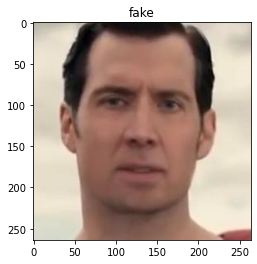

In [5]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

img = image.load_img('dataset/test_images/fake/df2.jpg', target_size=(256,256))
img_1 = Image.open('dataset/test_images/fake/df2.jpg')
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

img2 = image.load_img('dataset/test_images/real/real00240.jpg', target_size=(256,256))
img_2 = Image.open('dataset/test_images/real/real00240.jpg')
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis = 0)

classes = ['fake','real']

#print(classes[np.argmax(model.predict(img))])
#print(classes[np.argmax(model.predict(img2))])

plt.imshow(img_1)
plt.title(classes[np.argmax(model.predict(img))])

Text(0.5, 1.0, 'real')

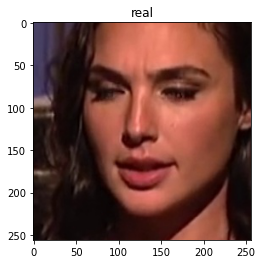

In [6]:
plt.imshow(img_2)
plt.title(classes[np.argmax(model.predict(img2))])

In [1]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

In [8]:
#model.save('model/vgg16/vgg16_2')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/vgg16/vgg16_2\assets


In [2]:
from tensorflow.keras.models import load_model

model = load_model('model/vgg16/vgg16_2')

In [7]:

val_dir = 'dataset/val_images'

dataGenerator = ImageDataGenerator(rescale=1./255)
test_gen = dataGenerator.flow_from_directory(
            val_dir,
            target_size=(256,256),
            batch_size=64,
            class_mode='categorical'
)

score = model.evaluate(val_generator)

Found 13037 images belonging to 2 classes.
26/26 [==============================] - 11s 404ms/step - loss: 0.3579 - accuracy: 0.5012


In [9]:
print(score[1])

0.5012345910072327
